In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
PATH = "C:/Users/Vlada_Savina/Documents/HW_HSE"

df = pd.read_csv(PATH + "/all.csv")

file1 = open(PATH + '/NYSE.txt',"r") 
NYSE_stocks = []
for line in file1:
    ln = line.split('\t')
    ln[1] = ln[1].split('\n')[0]
    NYSE_stocks.append(ln)
file1.close()
NYSE_stocks = NYSE_stocks[1:-1]

NYSE_indexes = []
for stock in NYSE_stocks:
    index = stock[0]
    NYSE_indexes.append(index)


In [3]:
def count_daily_profit(cur_day, next_day):
    return np.log(next_day / cur_day)

def get_log_profits(data, prices):
    profits = []
    # -1 чтобы за границы не выйти
    for i in range(len(data) - 1):
        profit = count_daily_profit(prices[i], prices[i+1])

        profits.append(profit)
    data = data[:len(data)-1]
    data['profit'] = profits
    return profits, data

In [5]:
log_profits = dict()
res_df = pd.DataFrame()
for stock_index in NYSE_indexes:
    stock_log_profits = dict()
    stock_data = df.loc[df['ticker'] == stock_index]
  #  stock_data = stock_data.reset_index()
    stock_date = stock_data.date
    if stock_data.shape[0] == 0:
        continue
    stock_profits, data = get_log_profits(stock_data, np.array(stock_data.close))
    log_profits.update({stock_index: [stock_profits, stock_date]})
    res_df = pd.concat([res_df, data])

C:\Users\Vlada_Savina\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [6]:
file = open(PATH + '/log_profits.txt', 'w+')
log_profits_strs = str(log_profits)
file.writelines(log_profits_strs)
file.close()

In [7]:
res_df

,Unnamed: 0,ticker,open,close,adj_close,low,high,volume,date,profit
348,13808355,A,45.930000,46.490002,45.861324,45.740002,46.750000,1739600,1/3/2017,0.013036
2372,13808370,A,46.930000,47.099998,46.463070,46.820000,47.380001,1821300,1/4/2017,-0.011961
5591,13808374,A,47.049999,46.540001,45.910652,46.360001,47.070000,1503700,1/5/2017,0.030681
7160,13808390,A,46.630001,47.990002,47.341042,46.560001,48.070000,2883400,1/6/2017,0.003121
10562,13808394,A,48.009998,48.139999,47.489006,47.910000,48.560001,2575300,1/9/2017,-0.000831
11011,13808410,A,48.340000,48.099998,47.449551,47.820000,48.540001,1560500,1/10/2017,0.023627
15346,13808414,A,48.029999,49.250000,48.584000,47.950001,49.480000,5624300,1/11/2017,-0.014933
17574,13808430,A,48.900002,48.520000,47.863869,47.980000,48.900002,3276900,1/12/2017,0.003498
19539,13808434,A,48.599998,48.689999,48.031567,48.410000,48.849998,1568500,1/13/2017,-0.007628
20170,13808450,A,48.369999,48.320000,47.666580,48.180000,48.720001,1938800,1/17/2017,-0.001450


In [15]:
stocks_means = []
stocks_std = []
stocks_indexes = []
for stock_log_profits in log_profits:
    stock_daily_profits = stock_log_profits
    stock_index = stock_daily_profits[0]
    stock_daily_profits = stock_daily_profits[1]
    stocks_means.append(np.mean(stock_daily_profits))
    stocks_std.append(np.std(stock_daily_profits))
    stocks_indexes.append(stock_index)

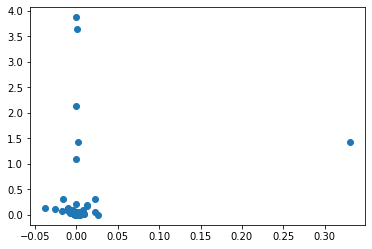

In [16]:
plt.plot(stocks_means, stocks_std, 'o')

In [12]:
res_df[res_df.ticker == 'AA']

,Unnamed: 0,ticker,open,close,adj_close,low,high,volume,date,profit
1602,14327705,AA,28.600000,28.830000,28.830000,28.170000,28.870001,2746400,1/3/2017,0.048410
2268,14327707,AA,29.020000,30.260000,30.260000,29.020000,30.299999,3339500,1/4/2017,0.012806
6503,14327725,AA,30.180000,30.650000,30.650000,30.115000,30.930000,2444600,1/5/2017,0.000978
7382,14327726,AA,30.690001,30.680000,30.680000,30.309999,31.100000,2086300,1/6/2017,-0.039899
10638,14327728,AA,30.879999,29.480000,29.480000,29.215000,30.879999,4199600,1/9/2017,0.049630
11151,14327745,AA,29.830000,30.980000,30.980000,29.730000,31.100000,3823600,1/10/2017,0.031456
15081,14327747,AA,31.080000,31.969999,31.969999,31.080000,32.000000,3068300,1/11/2017,0.032921
16348,14327766,AA,33.000000,33.040001,33.040001,32.509998,33.500000,4521700,1/12/2017,-0.000908
18108,14327768,AA,32.820000,33.009998,33.009998,32.529999,33.430000,3026200,1/13/2017,-0.011272
21015,14327785,AA,32.970001,32.639999,32.639999,32.520000,33.040001,1381800,1/17/2017,0.064366


In [96]:
IBM = res_df[res_df.ticker=='IBM']
MCD = res_df[res_df.ticker=='MCD']
NKE = res_df[res_df.ticker=='NKE']
V = res_df[res_df.ticker=='V']
#IBM[0].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
# plt.xlabel("Life Expectancy", fontsize=15)
# plt.ylabel("adj_close",fontsize=15)


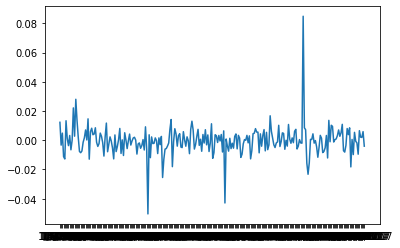

In [16]:
plt.plot(IBM.date, IBM.profit)

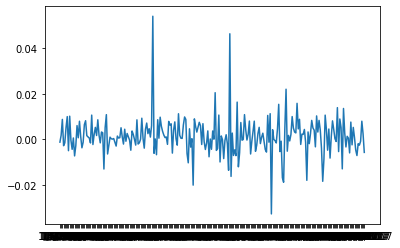

In [21]:
plt.plot(MCD.date, MCD.profit)

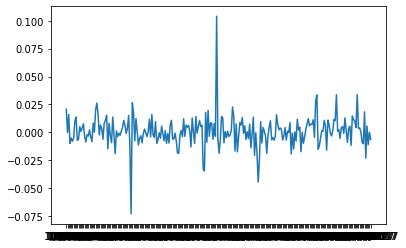

In [225]:
plt.plot(NKE.date, NKE.profit)

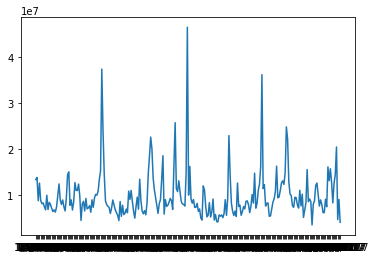

In [227]:
plt.plot(NKE.date, NKE.volume)

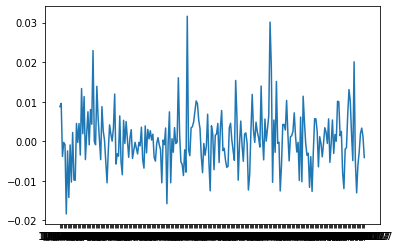

In [223]:
plt.plot(V.date, V.profit)

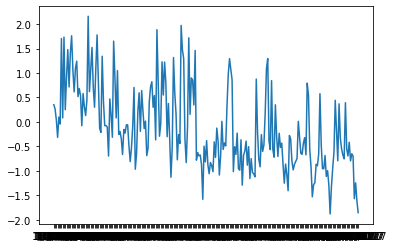

In [224]:
plt.plot(V.date, V.volume)

# Тест инверсий

In [98]:
def count_inversion(data):
    A = 0
    Ak = []
    Ai=0
    for i in range(0, len(data)-1):
        Ai=0
        for j in range(i, len(data)):
            if data.values[i]>data.values[j]:
                A+=1
                Ai+=1
        Ak = np.append(Ak, Ai)
    return A, Ak

Используем критерий инверсий с уровнем alpha = 0.05, чтобы показать, что наша выборка представляет "белый шум". 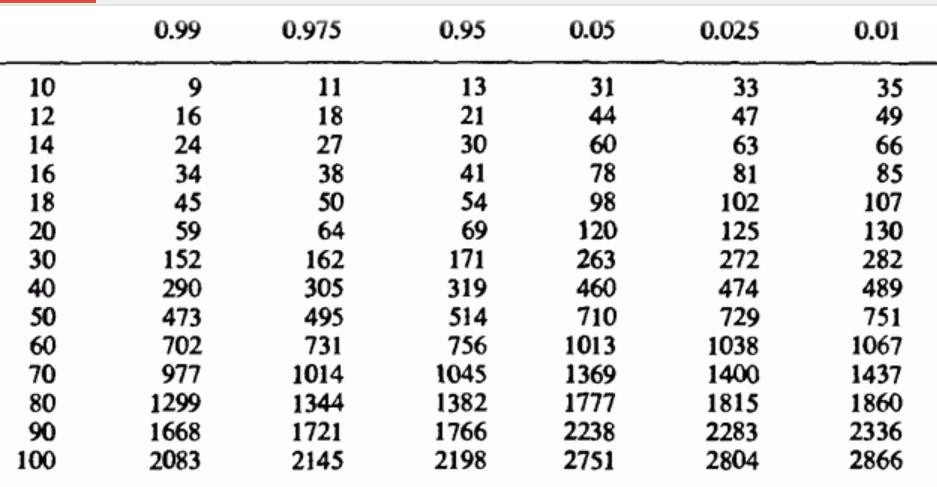

In [108]:
def check(A, name):
    if 1721<A<2283:
        print('Sample {} is independent and from the same distribution'.format(name))
    else:
         print('Sample is not independent and from the same distribution'.format(name))

NKE = res_df[res_df.ticker=='NKE']
NKE = NKE[NKE.index % 3 == 0]
NKE = NKE.reset_index()
A, Ak = count_inversion(NKE.profit)
print('n = {}, A(количество инверсий) = {} '.format(len(NKE) ,A))
check(A, 'NKE')


n = 91, A(количество инверсий) = 2041 
Sample NKE is independent and from the same distribution


In [109]:
IBM = res_df[res_df.ticker=='IBM']
IBM = IBM[IBM.index % 3 == 0]
IBM = IBM.reset_index()
A, Ak = count_inversion(IBM.profit)
print('n = {}, A(количество инверсий) = {} '.format(len(IBM) ,A))
check(A, 'IBM')


n = 84, A(количество инверсий) = 2024 
Sample IBM is independent and from the same distribution


# Проверка независимости активов

In [112]:
from scipy.stats import anderson
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import chi2_contingency
from scipy.stats import normaltest

def clear_data(data, low, high):
    data.profit = data.profit.where(high>data.profit)
    data.profit = data.profit.where(low<data.profit )
    data = data.dropna()
#    sns.boxplot(data.profit)
    return data

### 1. Исследуем на независимость активы из сферы здравохранения.

Для начала очистим данные от выбросов, затем проверим выборки на нормальность.

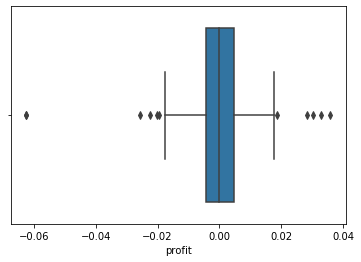

In [134]:
MRK = res_df[res_df.ticker=='MRK']
sns.boxplot(MRK.profit)


C:\Users\Vlada_Savina\anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


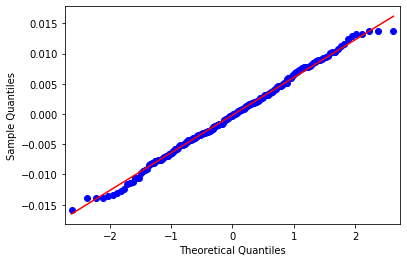

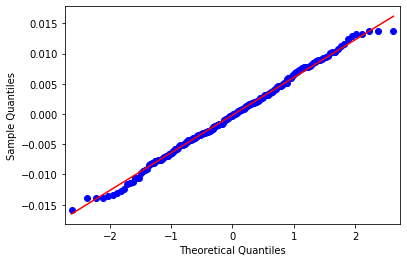

In [132]:
MRK = clear_data(MRK, -0.016, 0.014)
qqplot(MRK.profit, line='s')


Для критерия Андерсена: тк значение статистики меньше, чем  критическое значения для любого из уровней значимости, то распредление доходностей нормально распределено

In [24]:
result = anderson(MRK.profit)
result

AndersonResult(statistic=0.17412070013617154, critical_values=array([0.566, 0.645, 0.774, 0.903, 1.074]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Sample looks Gaussian (fail to reject H0)


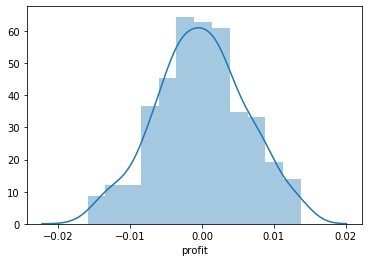

In [117]:
result, p = normaltest(MRK.profit)
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
sns.distplot(MRK.profit)

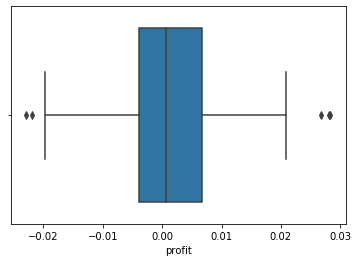

In [135]:
ABT = res_df[res_df.ticker=='ABT']
sns.boxplot(ABT.profit)

C:\Users\Vlada_Savina\anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


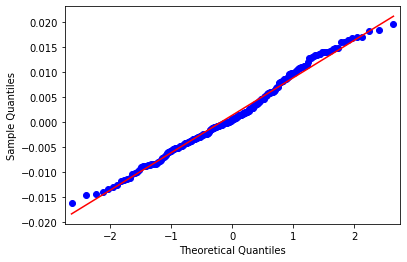

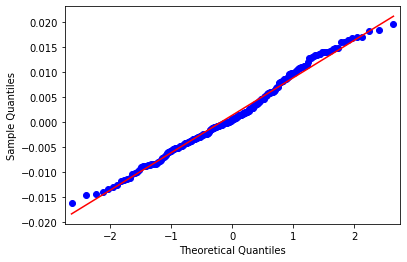

In [119]:
ABT = clear_data(ABT, -0.017, 0.02)
qqplot(ABT.profit, line='s')


In [120]:
result = anderson(ABT.profit)
result

AndersonResult(statistic=0.9971066769306276, critical_values=array([0.567, 0.645, 0.774, 0.903, 1.074]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Sample looks Gaussian (fail to reject H0)


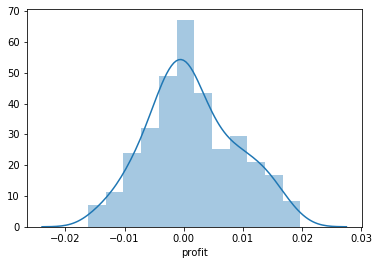

In [36]:
result, p = normaltest(ABT.profit)
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
sns.distplot(ABT.profit)

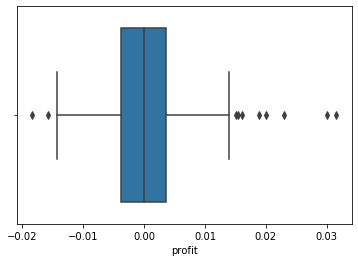

In [136]:
PFE = res_df[res_df.ticker=='PFE']
sns.boxplot(PFE.profit)

In [122]:
PFE = clear_data(PFE, -.015, 0.014)

C:\Users\Vlada_Savina\anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


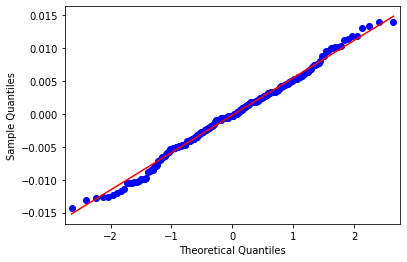

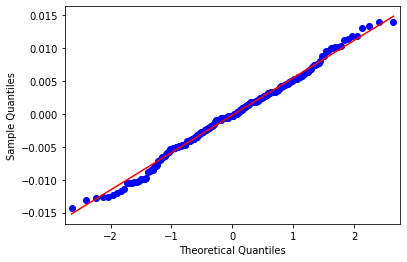

In [123]:
qqplot(PFE.profit, line='s')

In [124]:
result = anderson(PFE.profit)
result

AndersonResult(statistic=0.47383820924324027, critical_values=array([0.567, 0.646, 0.774, 0.903, 1.075]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Sample looks Gaussian (fail to reject H0)


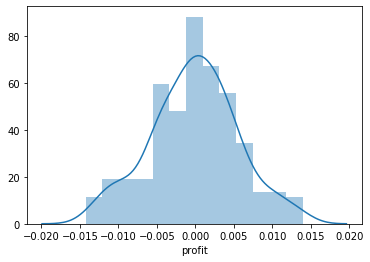

In [125]:
result, p = normaltest(PFE.profit)
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

sns.distplot(PFE.profit)

Посмотрим на независимость доходности и объемы продаж трех вышепредставленных активов.
1. Корреляция Пирсона. Как видно из карты, линейная зависимость отсутвует

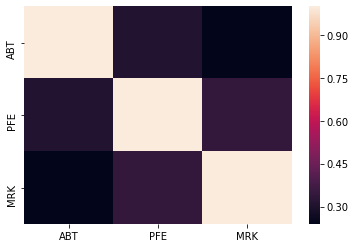

In [137]:
sns.heatmap(np.corrcoef([ABT.profit, PFE.profit, MRK.profit]),# IBM.profit, MCD.profit]), 
            xticklabels=['ABT','PFE', 'MRK'],
            yticklabels=['ABT','PFE', 'MRK'])



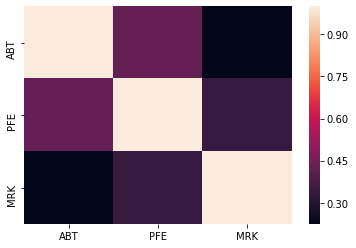

In [139]:
sns.heatmap(np.corrcoef([ABT.volume, PFE.volume, MRK.volume]),# IBM.profit, MCD.profit]), 
            xticklabels=['ABT','PFE', 'MRK'],
            yticklabels=['ABT','PFE', 'MRK'])



Итак, линейно зависимости выявлено не было, однако с помощью следующего метода из sklearn получаем, что иная функциональная завсимость между доходностями все-таки имеется (mutual_info_regression возвращает не 0)

[0.07675157]
[0.08499461]
[0.00204527]


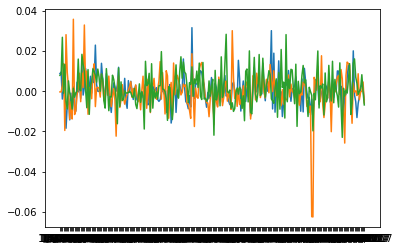

In [147]:
from sklearn.feature_selection import mutual_info_regression

plt.plot(PFE.date, PFE.profit)
plt.plot(MRK.date, MRK.profit)
plt.plot(ABT.date, ABT.profit)

print(mutual_info_regression(np.array(PFE.profit).reshape(-1, 1), np.array(MRK.profit)))
print(mutual_info_regression(np.array(PFE.profit).reshape(-1, 1), np.array(ABT.profit)))
print(mutual_info_regression(np.array(ABT.profit).reshape(-1, 1), np.array(MRK.profit)))

Для объемов продаж яитуация аналогичная:

[0.05284956]
[0.07859092]
[0.0119276]


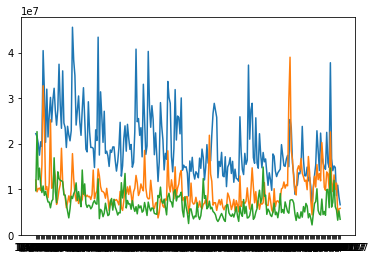

In [148]:
from sklearn.feature_selection import mutual_info_regression

plt.plot(PFE.date, PFE.volume)
plt.plot(MRK.date, MRK.volume)
plt.plot(ABT.date, ABT.volume)

print(mutual_info_regression(np.array(PFE.volume).reshape(-1, 1), np.array(MRK.volume)))
print(mutual_info_regression(np.array(PFE.volume).reshape(-1, 1), np.array(ABT.volume)))
print(mutual_info_regression(np.array(ABT.volume).reshape(-1, 1), np.array(MRK.volume)))

### 2. Рассмотрим активы из различных производственных секторов: Строительство жилых объектов и здравохранение

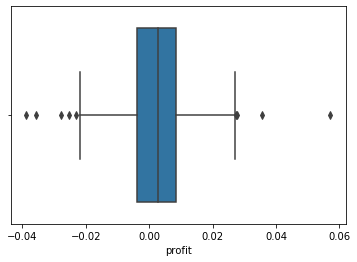

In [159]:
PHM = res_df[res_df.ticker=='PHM']
sns.boxplot(PHM.profit)


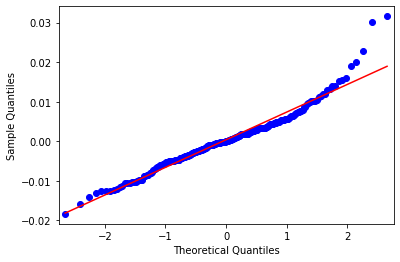

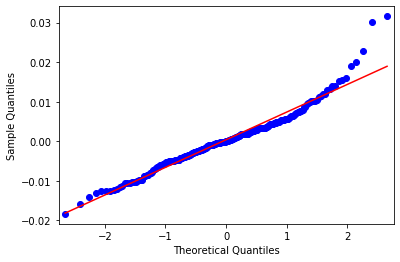

In [154]:
PHM = clear_data(PHM, -0.02, 0.025)
qqplot(PFE.profit, line='s')

Sample looks Gaussian (fail to reject H0)


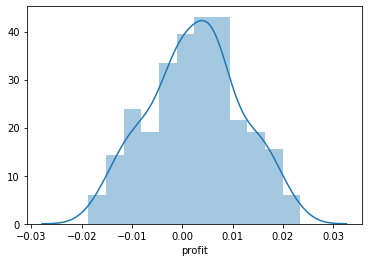

In [157]:
result, p = normaltest(PHM.profit)
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

sns.distplot(PHM.profit)

[0]
[0]


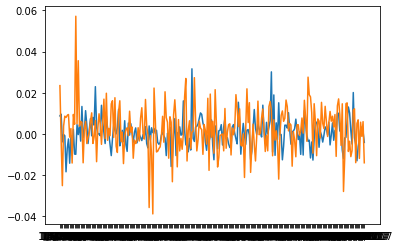

In [163]:
plt.plot(PFE.date, PFE.profit)
plt.plot(PHM.date, PHM.profit)

print(mutual_info_regression(np.array(PFE.profit).reshape(-1, 1), np.array(PHM.profit)))
print(mutual_info_regression(np.array(ABT.profit).reshape(-1, 1), np.array(PHM.profit)))

[0]
[0.03046141]


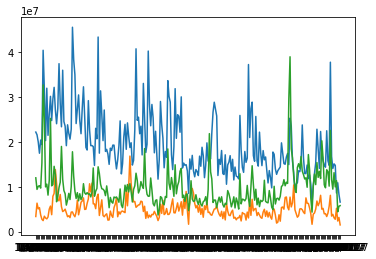

In [165]:
plt.plot(PFE.date, PFE.volume)
plt.plot(PHM.date, PHM.volume)
plt.plot(MRK.date, MRK.volume)

print(mutual_info_regression(np.array(PFE.volume).reshape(-1, 1), np.array(PHM.volume)))
print(mutual_info_regression(np.array(MRK.volume).reshape(-1, 1), np.array(PHM.volume)))

###  3. Рассмотрим зависимости между доходами и объемом продаж внутри одного актива

В случае актива PFE зависимость между доходом и объемама не выявлена, однако для PHM она сущетсвует.

[0]


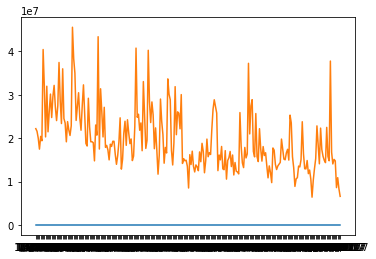

In [170]:
plt.plot(PFE.date, PFE.profit)
plt.plot(PFE.date, PFE.volume)
print(mutual_info_regression(np.array(PFE.profit).reshape(-1, 1), np.array(PFE.volume)))

[0.05060641]


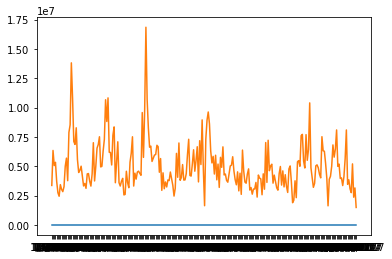

In [169]:
plt.plot(PHM.date, PHM.profit)
plt.plot(PHM.date, PHM.volume)
print(mutual_info_regression(np.array(PHM.profit).reshape(-1, 1), np.array(PHM.volume)))